In [2]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

n
2433


In [3]:
splitDataFrame = function (df) {
    df %>%
    mutate(
        Split.Condition = case_when(
            Neighborhood == 'Somerst' ~ 
                
                case_when(
                    LotShape2 == 'Reg' ~ 'Somerst Neighb. Reg Shape',
                    LotShape2 != 'Reg' ~ 'Somerst Neighb. non-Reg Shape'
                ),
            
            Neighborhood != 'Somerst' ~
                
                case_when(
                    LotShape2 == 'Reg' ~
                        
                        case_when(
                            HouseStyle.2Story == 'N' ~
                                case_when(
                                    GarageType2 == 'Detchd'  ~ 'Reg Shape non-2Story Garage Detchd',
                                    GarageType2 == 'Attchd'  ~ 'Reg Shape non-2Story Garage Attchd',
                                    GarageType2 == 'Another' ~ 'Reg Shape non-2Story Garage Another'
                                ),
                            HouseStyle.2Story == 'Y' ~ 'Reg Shape 2Story'
                        ),
                    
                    LotShape2 != 'Reg' ~
                        case_when(
                            LotConfig2 == 'Corner' ~ 'non-Reg Shape Corner Config',
                            LotConfig2 == 'Inside' ~ 'non-Reg Shape Inside Config',
                            LotConfig2 != 'Inside' & LotConfig2 != 'Corner' ~ 'non-Reg Shape Another Config'
                        )
                    
                )
        )
    ) %>%
    group_by(Split.Condition)
}

In [4]:
df = splitDataFrame(df.lot_frontage)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% summarise(n=n())
df %>% summarise(n=n()) %>% summarise(sum(n))
model %>% glance(mod)
model %>% tidy(mod)

Split.Condition,n
non-Reg Shape Another Config,101
non-Reg Shape Corner Config,123
non-Reg Shape Inside Config,433
Reg Shape 2Story,403
Reg Shape non-2Story Garage Another,154
Reg Shape non-2Story Garage Attchd,605
Reg Shape non-2Story Garage Detchd,452
Somerst Neighb. non-Reg Shape,49
Somerst Neighb. Reg Shape,113


sum(n)
2433


Split.Condition,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
non-Reg Shape Another Config,0.08690393,0.07768073,0.37234693,9.422326,2.766346e-03,2,-42.521905,91.04381,98.88917,13.725582,99
non-Reg Shape Corner Config,0.42330944,0.41854340,0.20391180,88.817895,3.790331e-16,2,22.057113,-38.11423,-29.67767,5.031183,121
non-Reg Shape Inside Config,0.30432032,0.30270621,0.24479397,188.538001,7.581044e-36,2,-4.020552,14.04110,26.25332,25.827281,431
Reg Shape 2Story,0.86861144,0.86828379,0.17843507,2651.016185,7.967247e-179,2,123.753061,-241.50612,-229.50931,12.767468,401
Reg Shape non-2Story Garage Another,0.61774388,0.61522904,0.22392848,245.639158,1.486310e-33,2,12.940018,-19.88004,-10.76918,7.621882,152
Reg Shape non-2Story Garage Attchd,0.73361615,0.73317439,0.14745037,1660.650739,2.340109e-175,2,300.673347,-595.34669,-582.13101,13.110192,603
Reg Shape non-2Story Garage Detchd,0.27667712,0.27506974,0.14934222,172.128811,1.589916e-33,2,219.126710,-432.25342,-419.91237,10.036394,450
Somerst Neighb. non-Reg Shape,0.43393465,0.42189070,0.30995755,36.029282,2.668880e-07,2,-11.112331,28.22466,33.90012,4.515463,47
Somerst Neighb. Reg Shape,0.98092928,0.98075747,0.06516072,5709.441459,2.771905e-97,2,149.260431,-292.52086,-284.33870,0.471297,111


Split.Condition,term,estimate,std.error,statistic,p.value
non-Reg Shape Another Config,(Intercept),1.5822263,0.78980634,2.0033092,4.787739e-02
non-Reg Shape Another Config,LotArea.Log,0.2555048,0.08323770,3.0695807,2.766346e-03
non-Reg Shape Corner Config,(Intercept),-0.4245613,0.52604986,-0.8070743,4.212073e-01
non-Reg Shape Corner Config,LotArea.Log,0.5300931,0.05624733,9.4243247,3.790331e-16
non-Reg Shape Inside Config,(Intercept),0.7430773,0.25627483,2.8995328,3.928211e-03
non-Reg Shape Inside Config,LotArea.Log,0.3808421,0.02773610,13.7309141,7.581044e-36
Reg Shape 2Story,(Intercept),-1.8681138,0.11535872,-16.1939543,9.657657e-46
Reg Shape 2Story,LotArea.Log,0.6697016,0.01300694,51.4880198,7.967247e-179
Reg Shape non-2Story Garage Another,(Intercept),-0.5991792,0.30026712,-1.9954874,4.777667e-02
Reg Shape non-2Story Garage Another,LotArea.Log,0.5246281,0.03347362,15.6728797,1.486310e-33


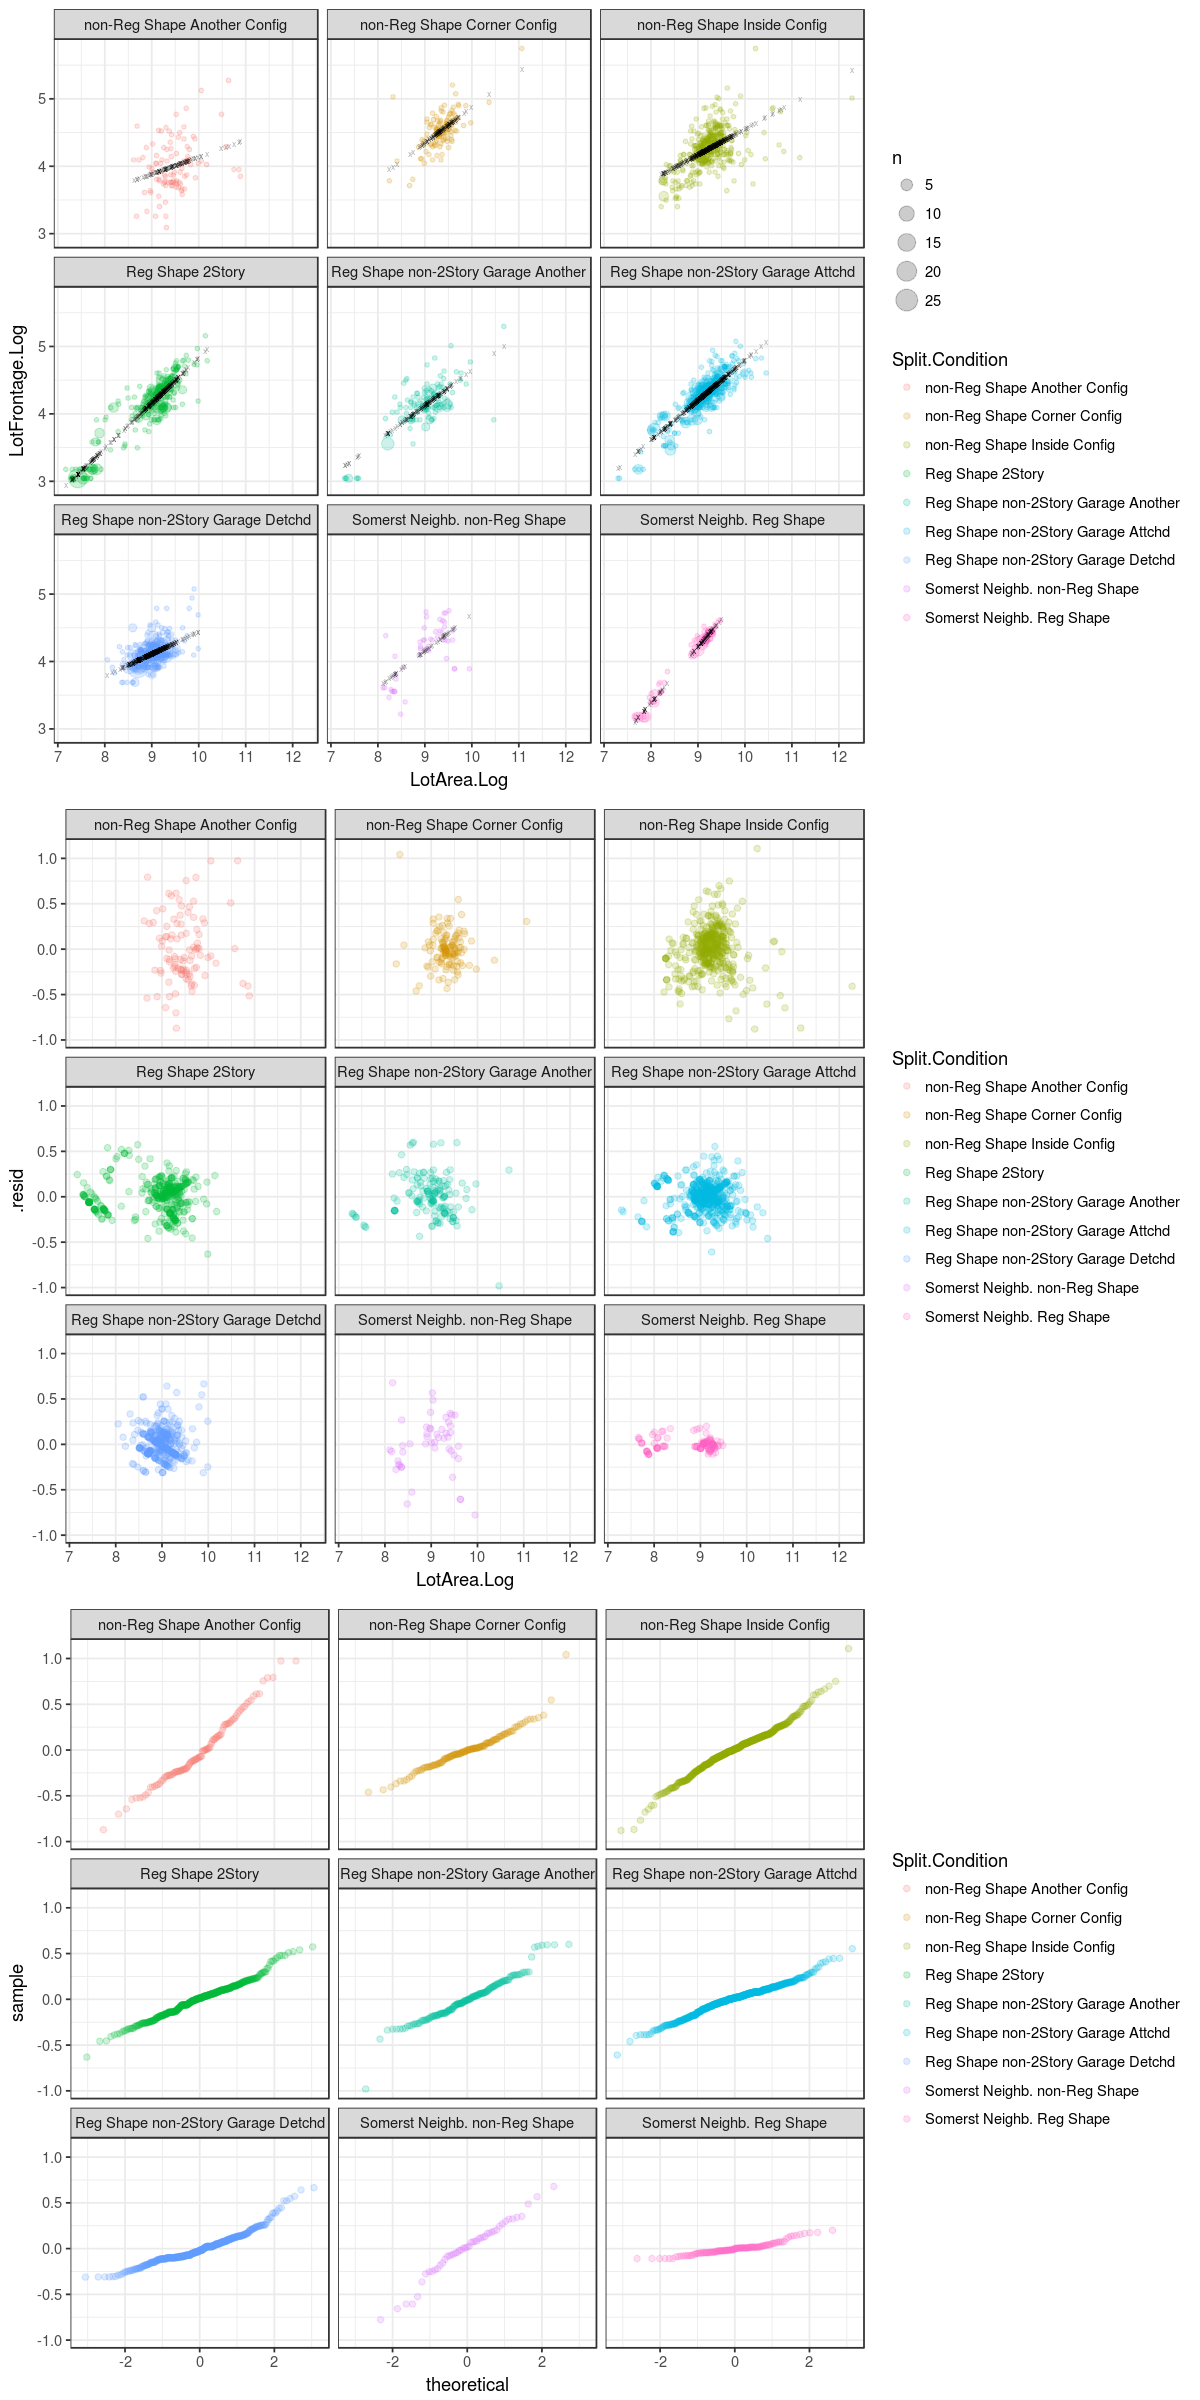

In [6]:
options(repr.plot.width = 10, repr.plot.height = 20)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = Split.Condition), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~Split.Condition) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=Split.Condition), alpha=0.2) +
    facet_wrap(~Split.Condition) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid, colour=Split.Condition)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    facet_wrap(~Split.Condition) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

In [5]:
print(model)

Source: local data frame [9 x 2]
Groups: <by row>

# A tibble: 9 x 2
                      Split.Condition      mod
*                               <chr>   <list>
1        non-Reg Shape Another Config <S3: lm>
2         non-Reg Shape Corner Config <S3: lm>
3         non-Reg Shape Inside Config <S3: lm>
4                    Reg Shape 2Story <S3: lm>
5 Reg Shape non-2Story Garage Another <S3: lm>
6  Reg Shape non-2Story Garage Attchd <S3: lm>
7  Reg Shape non-2Story Garage Detchd <S3: lm>
8       Somerst Neighb. non-Reg Shape <S3: lm>
9           Somerst Neighb. Reg Shape <S3: lm>


In [13]:
df.lot_frontage.is.na = df.combined %>% filter(is.na(LotFrontage))
df.lot_frontage.is.na %>% count()

df = splitDataFrame(df.lot_frontage.is.na) #%>% select(Split.Condition, LotArea.Log)

#df %>% summarise(n=n())
#df %>% summarise(n=n()) %>% summarise(sum(n))

df = df %>% nest(-Split.Condition) %>% inner_join(model, by='Split.Condition')
print(df)


n
486


# A tibble: 9 x 3
                      Split.Condition                data      mod
                                <chr>              <list>   <list>
1         non-Reg Shape Corner Config  <tibble [86 x 93]> <S3: lm>
2         non-Reg Shape Inside Config <tibble [158 x 93]> <S3: lm>
3        non-Reg Shape Another Config <tibble [101 x 93]> <S3: lm>
4                    Reg Shape 2Story  <tibble [32 x 93]> <S3: lm>
5  Reg Shape non-2Story Garage Attchd  <tibble [54 x 93]> <S3: lm>
6  Reg Shape non-2Story Garage Detchd  <tibble [21 x 93]> <S3: lm>
7 Reg Shape non-2Story Garage Another  <tibble [14 x 93]> <S3: lm>
8           Somerst Neighb. Reg Shape  <tibble [11 x 93]> <S3: lm>
9       Somerst Neighb. non-Reg Shape   <tibble [9 x 93]> <S3: lm>


In [12]:
d = y$data[[1]]

d

LotArea.Log
9.247829
9.298351
9.537411
9.186560
9.411157
9.245225
9.721306
9.658865
8.976768
9.002701


In [11]:
df %>% map(function (x) { print(x) })

[1] "non-Reg Shape Corner Config"         "non-Reg Shape Inside Config"        
[3] "non-Reg Shape Another Config"        "Reg Shape 2Story"                   
[5] "Reg Shape non-2Story Garage Attchd"  "Reg Shape non-2Story Garage Detchd" 
[7] "Reg Shape non-2Story Garage Another" "Somerst Neighb. Reg Shape"          
[9] "Somerst Neighb. non-Reg Shape"      
[[1]]
# A tibble: 86 x 1
   LotArea.Log
         <dbl>
 1    9.247829
 2    9.298351
 3    9.537411
 4    9.186560
 5    9.411157
 6    9.245225
 7    9.721306
 8    9.658865
 9    8.976768
10    9.002701
# ... with 76 more rows

[[2]]
# A tibble: 158 x 1
   LotArea.Log
         <dbl>
 1    9.470240
 2    9.017484
 3    9.044876
 4    9.051345
 5    9.268892
 6    8.955448
 7    8.502689
 8    8.832442
 9    9.278746
10    9.422059
# ... with 148 more rows

[[3]]
# A tibble: 101 x 1
   LotArea.Log
         <dbl>
 1    9.327323
 2    9.052985
 3    9.124782
 4    9.126959
 5    9.973620
 6    9.159573
 7    9.602585
 8    9.316501


$Split.Condition
[1] "non-Reg Shape Corner Config"         "non-Reg Shape Inside Config"        
[3] "non-Reg Shape Another Config"        "Reg Shape 2Story"                   
[5] "Reg Shape non-2Story Garage Attchd"  "Reg Shape non-2Story Garage Detchd" 
[7] "Reg Shape non-2Story Garage Another" "Somerst Neighb. Reg Shape"          
[9] "Somerst Neighb. non-Reg Shape"      

$data
$data[[1]]
# A tibble: 86 x 1
   LotArea.Log
         <dbl>
 1    9.247829
 2    9.298351
 3    9.537411
 4    9.186560
 5    9.411157
 6    9.245225
 7    9.721306
 8    9.658865
 9    8.976768
10    9.002701
# ... with 76 more rows

$data[[2]]
# A tibble: 158 x 1
   LotArea.Log
         <dbl>
 1    9.470240
 2    9.017484
 3    9.044876
 4    9.051345
 5    9.268892
 6    8.955448
 7    8.502689
 8    8.832442
 9    9.278746
10    9.422059
# ... with 148 more rows

$data[[3]]
# A tibble: 101 x 1
   LotArea.Log
         <dbl>
 1    9.327323
 2    9.052985
 3    9.124782
 4    9.126959
 5    9.973620
 6    